### Data Preparation

In [2]:
import requests
import pandas as pd
import numpy as np
import os
import requests
from dotenv import load_dotenv

In [107]:
from dune_client.client import DuneClient

load_dotenv()
dune = DuneClient("$DUNE_WHALES_MOVES")
API_KEY = os.getenv("COINGECKO_API_KEY")


In [108]:
# Fetching Ezxecution_id for the Dune's query 

query_id = 6184996  # This is the ID of your saved Dune query

resp = requests.post(
    f"https://api.dune.com/api/v1/query/{query_id}/execute",
    headers={"X-Dune-Api-Key": os.getenv("DUNE_WHALES_API")}
)

data = resp.json()
print(data)


{'execution_id': '01K9SRGW7JWBRDAHRF3DFJH6Q0', 'state': 'QUERY_STATE_PENDING'}


In [ ]:
import time

execution_id = "01K9SP5QJNPAMT3JKAJDRRHY5E"
results_url = f"https://api.dune.com/api/v1/execution/{execution_id}/results"

while True:
    results_response = requests.get(results_url, headers=headers)
    results_data = results_response.json()
    print("State:", results_data.get("state"))

    if results_data.get("state") == "QUERY_STATE_COMPLETED":
        print("✅ Query complete!")
        break
    elif results_data.get("state") == "QUERY_STATE_FAILED":
        raise RuntimeError("❌ Query failed:", results_data)
    else:
        time.sleep(10)

# Extract results into a dataframe
rows = results_data["result"]["rows"]
df_whales = pd.DataFrame(rows)
print(df_whales.head())


State: QUERY_STATE_COMPLETED
✅ Query complete!
   avg_whale_tx_size_usd  block_date  total_whale_volume_usd  \
0           1.193592e+06  2025-11-11            4.257542e+09   
1           1.355481e+06  2025-11-10            9.468031e+09   
2           7.837350e+05  2025-11-09            5.446959e+09   
3           9.275734e+05  2025-11-08            3.847574e+09   
4           1.360536e+06  2025-11-07            1.222986e+10   

   unique_whale_senders  whale_exchange_deposits_usd  \
0                  1201                 4.033050e+08   
1                  2037                 8.828411e+08   
2                  1601                 5.511095e+08   
3                  1286                 3.546087e+08   
4                  2701                 7.877743e+08   

   whale_exchange_withdrawals_usd  whale_net_exchange_flow_usd  whale_tx_count  
0                    7.182612e+08                 3.149561e+08            2610  
1                    1.080120e+09                 1.972789e+08       

In [124]:
df_whales.shape

(1821, 8)

In [126]:
df_whales.head(10)

,avg_whale_tx_size_usd,block_date,total_whale_volume_usd,unique_whale_senders,whale_exchange_deposits_usd,whale_exchange_withdrawals_usd,whale_net_exchange_flow_usd,whale_tx_count
0,1.193592e+06,2025-11-11,4.257542e+09,1201,4.033050e+08,7.182612e+08,3.149561e+08,2610
1,1.355481e+06,2025-11-10,9.468031e+09,2037,8.828411e+08,1.080120e+09,1.972789e+08,5023
2,7.837350e+05,2025-11-09,5.446959e+09,1601,5.511095e+08,6.434789e+08,9.236936e+07,4092
3,9.275734e+05,2025-11-08,3.847574e+09,1286,3.546087e+08,3.536825e+08,-9.262188e+05,2916
4,1.360536e+06,2025-11-07,1.222986e+10,2701,7.877743e+08,8.338868e+08,4.611254e+07,6159
5,1.384829e+06,2025-11-06,1.191784e+10,2355,9.140810e+08,8.799057e+08,-3.417538e+07,6347
6,1.105333e+06,2025-11-05,1.520165e+10,2658,1.262565e+09,1.377317e+09,1.147520e+08,8368
7,1.289660e+06,2025-11-04,1.972793e+10,3423,2.041963e+09,2.333362e+09,2.913998e+08,11035
8,1.214032e+06,2025-11-03,1.175668e+10,2675,1.090294e+09,8.773883e+08,-2.129055e+08,6645
9,6.547742e+05,2025-11-02,3.543638e+09,2273,2.282294e+08,2.700126e+08,4.178323e+07,4224


In [111]:
df_whales.isnull().sum()


avg_whale_tx_size_usd             0
block_date                        0
total_whale_volume_usd            0
unique_whale_senders              0
whale_exchange_deposits_usd       0
whale_exchange_withdrawals_usd    0
whale_net_exchange_flow_usd       0
whale_tx_count                    0
dtype: int64

In [112]:
df_whales.dtypes

avg_whale_tx_size_usd             float64
block_date                         object
total_whale_volume_usd            float64
unique_whale_senders                int64
whale_exchange_deposits_usd       float64
whale_exchange_withdrawals_usd    float64
whale_net_exchange_flow_usd       float64
whale_tx_count                      int64
dtype: object

In [127]:

def fetch_coin_prices(symbol: str, api_key: str):
    """
    Fetch full historical daily price data for a token using Coingecko Pro.
    Returns a pandas DataFrame with columns: ['block_date', 'price_usd'].
    """

    url = f"https://pro-api.coingecko.com/api/v3/coins/{symbol}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": "1820",
        "interval": "daily"
    }
    headers = {"x-cg-pro-api-key": api_key}

    print(f"📡 Fetching {symbol.upper()} data from Coingecko Pro...")
    resp = requests.get(url, params=params, headers=headers)

    if resp.status_code != 200:
        print(f"❌ HTTP Error {resp.status_code}")
        print(resp.text)
        return None

    data = resp.json()

    if "prices" not in data:
        print("⚠️ Unexpected response structure. Here's what Coingecko returned:")
        print(data)
        return None

    prices = pd.DataFrame(data["prices"], columns=["timestamp", "price_usd"])
    prices["block_date"] = pd.to_datetime(prices["timestamp"], unit="ms").dt.date

    print(f"✅ Retrieved {len(prices)} daily data points for {symbol.upper()}")
    return prices[["block_date", "price_usd"]]


# === Example usage ===
if __name__ == "__main__":
    df_prices = fetch_coin_prices("ethereum", API_KEY)
    if df_prices is not None:
        print(df_prices.head())


📡 Fetching ETHEREUM data from Coingecko Pro...
✅ Retrieved 1821 daily data points for ETHEREUM
   block_date   price_usd
0  2020-11-18  482.198385
1  2020-11-19  479.437661
2  2020-11-20  471.317958
3  2020-11-21  508.792215
4  2020-11-22  548.842116


In [128]:
df_prices.shape

(1821, 2)

In [129]:
df_prices.isnull().sum()

block_date    0
price_usd     0
dtype: int64

In [116]:

print( 'df_whales schema')
print(df_whales.dtypes)
print()
print()
print('df_prices schema') 
print(df_prices.dtypes)



df_whales schema
avg_whale_tx_size_usd             float64
block_date                         object
total_whale_volume_usd            float64
unique_whale_senders                int64
whale_exchange_deposits_usd       float64
whale_exchange_withdrawals_usd    float64
whale_net_exchange_flow_usd       float64
whale_tx_count                      int64
dtype: object


df_prices schema
block_date     object
price_usd     float64
dtype: object


In [151]:
# Ensure block_date is a proper date only
df_prices['block_date'] = pd.to_datetime(df_prices['block_date']).dt.date
df_whales['block_date'] = pd.to_datetime(df_whales['block_date']).dt.date

# Aggregate prices by day to remove multiple entries
df_prices_daily = (
    df_prices.groupby('block_date', as_index=False)
    .agg({'price_usd': 'last'})  # Takes the last price of the day
)

# Merge cleanly with the deduplicated prices
df_merged = pd.merge(df_whales, df_prices_daily, on='block_date', how='inner')

# Remove any remaining duplicates (in case df_whales has duplicates too)
df_merged = df_merged.drop_duplicates(subset='block_date', keep='last')

# Sort by date ascending (needed for proper returns)
df_merged = df_merged.sort_values(by='block_date', ascending=False).reset_index(drop=True)

# Compute daily return
df_merged['daily_return'] = df_merged['price_usd'].pct_change()

# Compute next day price direction (target variable)
df_merged['next_day_price_direction'] = (df_merged['daily_return'].shift(-1) > 0).astype(int)

# Move block_date to be the first column
cols = ['block_date'] + [c for c in df_merged.columns if c != 'block_date']
df_merged = df_merged[cols]

# Save to CSV
output_file = "merged_whales_prices_ml.csv"
df_merged.to_csv(output_file, index=False)

print(f"Merged ML-ready dataset saved to {output_file}")
print(f"Total rows: {len(df_merged)}")
print("\nFirst few rows:")
print(df_merged.head())
print("\nLast few rows:")
print(df_merged.tail())

# Verify no duplicates
duplicates = df_merged[df_merged.duplicated(subset='block_date', keep=False)]
if len(duplicates) > 0:
    print(f"\nWarning: {len(duplicates)} duplicate dates found:")
    print(duplicates[['block_date', 'price_usd']])
else:
    print("\n✓ No duplicate dates found")

Merged ML-ready dataset saved to merged_whales_prices_ml.csv
Total rows: 1820

First few rows:
   block_date  avg_whale_tx_size_usd  total_whale_volume_usd  \
0  2025-11-11           1.193592e+06            4.257542e+09   
1  2025-11-10           1.355481e+06            9.468031e+09   
2  2025-11-09           7.837350e+05            5.446959e+09   
3  2025-11-08           9.275734e+05            3.847574e+09   
4  2025-11-07           1.360536e+06            1.222986e+10   

   unique_whale_senders  whale_exchange_deposits_usd  \
0                  1201                 4.033050e+08   
1                  2037                 8.828411e+08   
2                  1601                 5.511095e+08   
3                  1286                 3.546087e+08   
4                  2701                 7.877743e+08   

   whale_exchange_withdrawals_usd  whale_net_exchange_flow_usd  \
0                    7.182612e+08                 3.149561e+08   
1                    1.080120e+09                 1

In [152]:
df_merged.head()

,block_date,avg_whale_tx_size_usd,total_whale_volume_usd,unique_whale_senders,whale_exchange_deposits_usd,whale_exchange_withdrawals_usd,whale_net_exchange_flow_usd,whale_tx_count,price_usd,daily_return,next_day_price_direction
0,2025-11-11,1.193592e+06,4.257542e+09,1201,4.033050e+08,7.182612e+08,3.149561e+08,2610,3473.887366,NaN,1
1,2025-11-10,1.355481e+06,9.468031e+09,2037,8.828411e+08,1.080120e+09,1.972789e+08,5023,3576.254705,0.029468,0
2,2025-11-09,7.837350e+05,5.446959e+09,1601,5.511095e+08,6.434789e+08,9.236936e+07,4092,3401.459400,-0.048877,1
3,2025-11-08,9.275734e+05,3.847574e+09,1286,3.546087e+08,3.536825e+08,-9.262188e+05,2916,3434.351229,0.009670,0
4,2025-11-07,1.360536e+06,1.222986e+10,2701,7.877743e+08,8.338868e+08,4.611254e+07,6159,3308.918165,-0.036523,1


In [5]:
df_whale_prices = pd.read_csv('merged_whales_prices_ml.csv')
df_whale_prices.head(10)

,block_date,avg_whale_tx_size_usd,total_whale_volume_usd,unique_whale_senders,whale_exchange_deposits_usd,whale_exchange_withdrawals_usd,whale_net_exchange_flow_usd,whale_tx_count,price_usd,daily_return,next_day_price_direction
0,2025-11-11,1193591.8242,4257542036.9798,1201,403305046.6349,718261154.5044,314956107.8695,2610,3473.8874,NaN,1
1,2025-11-10,1355480.5218,9468031444.8533,2037,882841094.5221,1080120044.1609,197278949.6389,5023,3576.2547,0.0295,0
2,2025-11-09,783735.0463,5446958571.4710,1601,551109527.0158,643478889.3127,92369362.2969,4092,3401.4594,-0.0489,1
3,2025-11-08,927573.4028,3847574474.7951,1286,354608708.7849,353682489.9514,-926218.8336,2916,3434.3512,0.0097,0
4,2025-11-07,1360536.3980,12229861681.1954,2701,787774264.4623,833886801.4207,46112536.9584,6159,3308.9182,-0.0365,1
5,2025-11-06,1384829.3466,11917841357.2345,2355,914081035.3861,879905652.6275,-34175382.7585,6347,3427.6906,0.0359,0
6,2025-11-05,1105333.1318,15201646561.5879,2658,1262565274.7788,1377317253.9061,114751979.1273,8368,3296.7438,-0.0382,1
7,2025-11-04,1289660.1307,19727931018.5613,3423,2041962640.2430,2333362421.2813,291399781.0383,11035,3600.7155,0.0922,1
8,2025-11-03,1214031.7902,11756683856.0102,2675,1090293865.8627,877388326.0505,-212905539.8122,6645,3910.0948,0.0859,0
9,2025-11-02,654774.2483,3543638231.9229,2273,228229396.0728,270012626.5931,41783230.5203,4224,3872.2119,-0.0097,0


In [155]:
df_whale_prices.shape

(1820, 11)

In [156]:
df_whale_prices.dtypes

block_date                         object
avg_whale_tx_size_usd             float64
total_whale_volume_usd            float64
unique_whale_senders                int64
whale_exchange_deposits_usd       float64
whale_exchange_withdrawals_usd    float64
whale_net_exchange_flow_usd       float64
whale_tx_count                      int64
price_usd                         float64
daily_return                      float64
next_day_price_direction            int64
dtype: object

In [7]:

# changing block_date from object to data data type
df_whale_prices['block_date'] = pd.to_datetime(df_whale_prices['block_date'])


In [8]:
df_whale_prices.dtypes

block_date                        datetime64[ns]
avg_whale_tx_size_usd                    float64
total_whale_volume_usd                   float64
unique_whale_senders                       int64
whale_exchange_deposits_usd              float64
whale_exchange_withdrawals_usd           float64
whale_net_exchange_flow_usd              float64
whale_tx_count                             int64
price_usd                                float64
daily_return                             float64
next_day_price_direction                   int64
dtype: object

In [161]:
df_whale_prices.head()

,block_date,avg_whale_tx_size_usd,total_whale_volume_usd,unique_whale_senders,whale_exchange_deposits_usd,whale_exchange_withdrawals_usd,whale_net_exchange_flow_usd,whale_tx_count,price_usd,daily_return,next_day_price_direction
0,2025-11-11,1.193592e+06,4.257542e+09,1201,4.033050e+08,7.182612e+08,3.149561e+08,2610,3473.887366,NaN,1
1,2025-11-10,1.355481e+06,9.468031e+09,2037,8.828411e+08,1.080120e+09,1.972789e+08,5023,3576.254705,0.029468,0
2,2025-11-09,7.837350e+05,5.446959e+09,1601,5.511095e+08,6.434789e+08,9.236936e+07,4092,3401.459400,-0.048877,1
3,2025-11-08,9.275734e+05,3.847574e+09,1286,3.546087e+08,3.536825e+08,-9.262188e+05,2916,3434.351229,0.009670,0
4,2025-11-07,1.360536e+06,1.222986e+10,2701,7.877743e+08,8.338868e+08,4.611254e+07,6159,3308.918165,-0.036523,1


### Exploratory Data Analysis(EDA)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
pd.options.display.float_format = '{:.4f}'.format

In [10]:
# df = pd.read_csv("../data/merged_whales_prices_ml.csv", parse_dates=["block_date"])
#df = df.sort_values("block_date").reset_index(drop=True)
df_whale_prices.info()
df_whale_prices.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   block_date                      1820 non-null   datetime64[ns]
 1   avg_whale_tx_size_usd           1820 non-null   float64       
 2   total_whale_volume_usd          1820 non-null   float64       
 3   unique_whale_senders            1820 non-null   int64         
 4   whale_exchange_deposits_usd     1820 non-null   float64       
 5   whale_exchange_withdrawals_usd  1820 non-null   float64       
 6   whale_net_exchange_flow_usd     1820 non-null   float64       
 7   whale_tx_count                  1820 non-null   int64         
 8   price_usd                       1820 non-null   float64       
 9   daily_return                    1819 non-null   float64       
 10  next_day_price_direction        1820 non-null   int64         
dtypes: d

,block_date,avg_whale_tx_size_usd,total_whale_volume_usd,unique_whale_senders,whale_exchange_deposits_usd,whale_exchange_withdrawals_usd,whale_net_exchange_flow_usd,whale_tx_count,price_usd,daily_return,next_day_price_direction
0,2025-11-11,1193591.8242,4257542036.9798,1201,403305046.6349,718261154.5044,314956107.8695,2610,3473.8874,NaN,1
1,2025-11-10,1355480.5218,9468031444.8533,2037,882841094.5221,1080120044.1609,197278949.6389,5023,3576.2547,0.0295,0
2,2025-11-09,783735.0463,5446958571.4710,1601,551109527.0158,643478889.3127,92369362.2969,4092,3401.4594,-0.0489,1
3,2025-11-08,927573.4028,3847574474.7951,1286,354608708.7849,353682489.9514,-926218.8336,2916,3434.3512,0.0097,0
4,2025-11-07,1360536.3980,12229861681.1954,2701,787774264.4623,833886801.4207,46112536.9584,6159,3308.9182,-0.0365,1


In [11]:
# check duplicates / nulls / date continuity
print("duplicates:", df_whale_prices.duplicated(subset="block_date").sum())
print("nulls per col:\n", df_whale_prices.isna().sum())

# check date range
print(df_whale_prices.block_date.min(), df_whale_prices.block_date.max())


duplicates: 0
nulls per col:
 block_date                        0
avg_whale_tx_size_usd             0
total_whale_volume_usd            0
unique_whale_senders              0
whale_exchange_deposits_usd       0
whale_exchange_withdrawals_usd    0
whale_net_exchange_flow_usd       0
whale_tx_count                    0
price_usd                         0
daily_return                      1
next_day_price_direction          0
dtype: int64
2020-11-18 00:00:00 2025-11-11 00:00:00


In [ ]:
# Dropping the first row that has NaN on daily_retrun column

df_whale_prices = df_whale_prices.dropna(subset=['daily_return'])

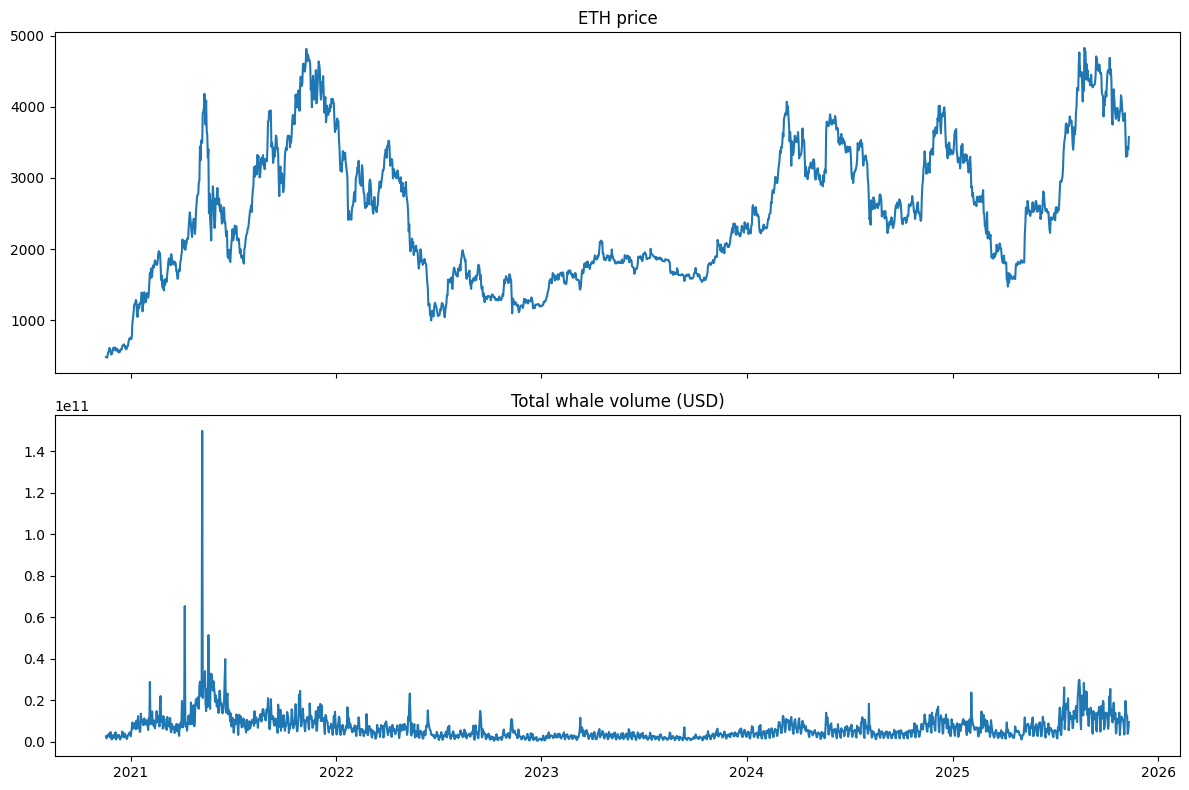

In [15]:
# time series of price and total_whale_volume_usd
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)
ax[0].plot(df_whale_prices.block_date, df_whale_prices.price_usd); ax[0].set_title("ETH price")
ax[1].plot(df_whale_prices.block_date, df_whale_prices.total_whale_volume_usd); ax[1].set_title("Total whale volume (USD)")
plt.tight_layout()


In [ ]:
# Find the extreme outliers
top_volume_days = df_whale_prices.nlargest(10, 'total_whale_volume_usd')[
    ['block_date', 'total_whale_volume_usd', 'price_usd', 'whale_tx_count']
]
print(top_volume_days)

# This might be:
# 1. Real (exchange launches, major events)
# 2. Need special handling in ML model

     block_date  total_whale_volume_usd  price_usd  whale_tx_count
1648 2021-05-08       149809645175.7704  3493.5345           13348
1679 2021-04-07        65423028123.9911  2115.0555            7827
1637 2021-05-19        51427474027.6270  3399.0493           26867
1607 2021-06-18        39835096543.1579  2380.7445            6731
1636 2021-05-20        34247073971.0108  2505.0149           17324
1643 2021-05-13        34039891218.5698  3906.1089           21349
1632 2021-05-24        32853373700.3540  2120.0374           13137
1631 2021-05-25        32081732514.8866  2640.1596           10784
1608 2021-06-17        31146460004.0162  2365.8728            5760
89   2025-08-14        29907140675.2914  4763.6525           12141


In [17]:
# --- Volume Features ---
df_whale_prices['whale_volume_log'] = np.log1p(df_whale_prices['total_whale_volume_usd'])

# Moving averages
df_whale_prices['whale_volume_ma7'] = df_whale_prices['total_whale_volume_usd'].rolling(7, min_periods=1).mean()
df_whale_prices['whale_volume_ma30'] = df_whale_prices['total_whale_volume_usd'].rolling(30, min_periods=1).mean()

# Volume relative to moving average
df_whale_prices['whale_volume_vs_ma7'] = (
    df_whale_prices['total_whale_volume_usd'] / df_whale_prices['whale_volume_ma7']
)
df_whale_prices['whale_volume_vs_ma30'] = (
    df_whale_prices['total_whale_volume_usd'] / df_whale_prices['whale_volume_ma30']
)

# Volume spikes
df_whale_prices['volume_spike'] = (
    df_whale_prices['whale_volume_vs_ma30'] > 2
).astype(int)


In [18]:
# --- Price Features ---
df_whale_prices['price_ma7'] = df_whale_prices['price_usd'].rolling(7, min_periods=1).mean()
df_whale_prices['price_ma30'] = df_whale_prices['price_usd'].rolling(30, min_periods=1).mean()

# Price momentum
df_whale_prices['price_vs_ma7'] = df_whale_prices['price_usd'] / df_whale_prices['price_ma7']
df_whale_prices['price_vs_ma30'] = df_whale_prices['price_usd'] / df_whale_prices['price_ma30']


In [20]:
df_whale_prices.head()

,block_date,avg_whale_tx_size_usd,total_whale_volume_usd,unique_whale_senders,whale_exchange_deposits_usd,whale_exchange_withdrawals_usd,whale_net_exchange_flow_usd,whale_tx_count,price_usd,daily_return,...,whale_volume_log,whale_volume_ma7,whale_volume_ma30,whale_volume_vs_ma7,whale_volume_vs_ma30,volume_spike,price_ma7,price_ma30,price_vs_ma7,price_vs_ma30
1,2025-11-10,1355480.5218,9468031444.8533,2037,882841094.5221,1080120044.1609,197278949.6389,5023,3576.2547,0.0295,...,22.9712,9468031444.8533,9468031444.8533,1.0000,1.0000,0,3576.2547,3576.2547,1.0000,1.0000
2,2025-11-09,783735.0463,5446958571.4710,1601,551109527.0158,643478889.3127,92369362.2969,4092,3401.4594,-0.0489,...,22.4183,7457495008.1622,7457495008.1622,0.7304,0.7304,0,3488.8571,3488.8571,0.9749,0.9749
3,2025-11-08,927573.4028,3847574474.7951,1286,354608708.7849,353682489.9514,-926218.8336,2916,3434.3512,0.0097,...,22.0707,6254188163.7065,6254188163.7065,0.6152,0.6152,0,3470.6884,3470.6884,0.9895,0.9895
4,2025-11-07,1360536.3980,12229861681.1954,2701,787774264.4623,833886801.4207,46112536.9584,6159,3308.9182,-0.0365,...,23.2271,7748106543.0787,7748106543.0787,1.5784,1.5784,0,3430.2459,3430.2459,0.9646,0.9646
5,2025-11-06,1384829.3466,11917841357.2345,2355,914081035.3861,879905652.6275,-34175382.7585,6347,3427.6906,0.0359,...,23.2013,8582053505.9099,8582053505.9099,1.3887,1.3887,0,3429.7348,3429.7348,0.9994,0.9994


In [21]:
# Volatility (rolling std of returns)
df_whale_prices['volatility_7d'] = df_whale_prices['daily_return'].rolling(7, min_periods=1).std()
df_whale_prices['volatility_30d'] = df_whale_prices['daily_return'].rolling(30, min_periods=1).std()

In [24]:
# --- Exchange Flow Features ---
df_whale_prices['net_flow_log'] = np.log1p(
    df_whale_prices['whale_net_exchange_flow_usd'].abs()
) * np.sign(df_whale_prices['whale_net_exchange_flow_usd'])

df_whale_prices['deposit_withdrawal_ratio'] = (
    df_whale_prices['whale_exchange_deposits_usd'] / 
    (df_whale_prices['whale_exchange_withdrawals_usd'] + 1)  # +1 to avoid division by zero
)


In [23]:
# --- Transaction Features ---
df_whale_prices['avg_tx_size_log'] = np.log1p(df_whale_prices['avg_whale_tx_size_usd'])
df_whale_prices['tx_count_ma7'] = df_whale_prices['whale_tx_count'].rolling(7, min_periods=1).mean()
df_whale_prices['tx_count_vs_ma7'] = df_whale_prices['whale_tx_count'] / df_whale_prices['tx_count_ma7']

# --- Lagged Features (yesterday's values can predict today) ---
df_whale_prices['volume_lag1'] = df_whale_prices['total_whale_volume_usd'].shift(1)
df_whale_prices['return_lag1'] = df_whale_prices['daily_return'].shift(1)
df_whale_prices['net_flow_lag1'] = df_whale_prices['whale_net_exchange_flow_usd'].shift(1)

# --- Interaction Features ---
df_whale_prices['volume_x_return'] = (
    df_whale_prices['total_whale_volume_usd'] * df_whale_prices['daily_return'].abs()
)


In [27]:
df_whale_prices.dtypes

block_date                        datetime64[ns]
avg_whale_tx_size_usd                    float64
total_whale_volume_usd                   float64
unique_whale_senders                       int64
whale_exchange_deposits_usd              float64
whale_exchange_withdrawals_usd           float64
whale_net_exchange_flow_usd              float64
whale_tx_count                             int64
price_usd                                float64
daily_return                             float64
next_day_price_direction                   int64
whale_volume_log                         float64
whale_volume_ma7                         float64
whale_volume_ma30                        float64
whale_volume_vs_ma7                      float64
whale_volume_vs_ma30                     float64
volume_spike                               int64
price_ma7                                float64
price_ma30                               float64
price_vs_ma7                             float64
price_vs_ma30       

In [30]:
df_whale_prices.isnull().sum()

block_date                        0
avg_whale_tx_size_usd             0
total_whale_volume_usd            0
unique_whale_senders              0
whale_exchange_deposits_usd       0
whale_exchange_withdrawals_usd    0
whale_net_exchange_flow_usd       0
whale_tx_count                    0
price_usd                         0
daily_return                      0
next_day_price_direction          0
whale_volume_log                  0
whale_volume_ma7                  0
whale_volume_ma30                 0
whale_volume_vs_ma7               0
whale_volume_vs_ma30              0
volume_spike                      0
price_ma7                         0
price_ma30                        0
price_vs_ma7                      0
price_vs_ma30                     0
volatility_7d                     1
volatility_30d                    1
avg_tx_size_log                   0
tx_count_ma7                      0
tx_count_vs_ma7                   0
volume_lag1                       1
return_lag1                 

In [31]:
# Lets do some clean up from the dataset

# Drop rows with NaN from rolling calculations (first 30 days mostly)
print(f"\nNaN values per column after feature engineering:")
print(df_whale_prices.isna().sum()[df_whale_prices.isna().sum() > 0])



NaN values per column after feature engineering:
volatility_7d     1
volatility_30d    1
volume_lag1       1
return_lag1       1
net_flow_lag1     1
dtype: int64


In [32]:
# Drop rows with any NaN
df_whale_prices_clean = df_whale_prices.dropna().reset_index(drop=True)

In [33]:
print(f"\nAfter dropping NaN: {len(df_whale_prices_clean)} rows")
print(f"Date range: {df_whale_prices_clean['block_date'].min()} to {df_whale_prices_clean['block_date'].max()}")



After dropping NaN: 1818 rows
Date range: 2020-11-18 00:00:00 to 2025-11-09 00:00:00


In [34]:
df_whale_prices_clean

,block_date,avg_whale_tx_size_usd,total_whale_volume_usd,unique_whale_senders,whale_exchange_deposits_usd,whale_exchange_withdrawals_usd,whale_net_exchange_flow_usd,whale_tx_count,price_usd,daily_return,...,volatility_30d,avg_tx_size_log,tx_count_ma7,tx_count_vs_ma7,volume_lag1,return_lag1,net_flow_lag1,volume_x_return,net_flow_log,deposit_withdrawal_ratio
0,2025-11-09,783735.0463,5446958571.4710,1601,551109527.0158,643478889.3127,92369362.2969,4092,3401.4594,-0.0489,...,0.0554,13.5718,4557.5000,0.8979,9468031444.8533,0.0295,197278949.6389,266229018.8374,18.3413,0.8565
1,2025-11-08,927573.4028,3847574474.7951,1286,354608708.7849,353682489.9514,-926218.8336,2916,3434.3512,0.0097,...,0.0407,13.7403,4010.3333,0.7271,5446958571.4710,-0.0489,92369362.2969,37205723.6848,-13.7389,1.0026
2,2025-11-07,1360536.3980,12229861681.1954,2701,787774264.4623,833886801.4207,46112536.9584,6159,3308.9182,-0.0365,...,0.0372,14.1234,4547.5000,1.3544,3847574474.7951,0.0097,-926218.8336,446672141.5768,17.6466,0.9447
3,2025-11-06,1384829.3466,11917841357.2345,2355,914081035.3861,879905652.6275,-34175382.7585,6347,3427.6906,0.0359,...,0.0386,14.1411,4907.4000,1.2934,12229861681.1954,-0.0365,46112536.9584,427786625.5611,-17.3470,1.0388
4,2025-11-05,1105333.1318,15201646561.5879,2658,1262565274.7788,1377317253.9061,114751979.1273,8368,3296.7438,-0.0382,...,0.0375,13.9157,5484.1667,1.5258,11917841357.2345,0.0359,-34175382.7585,580743036.5249,18.5583,0.9167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,2020-11-22,549637.4683,3042243386.8592,1233,157489522.4076,46032503.0746,-111457019.3330,3892,548.8421,-0.0208,...,0.0451,13.2170,3604.2857,1.0798,3867912523.6057,-0.0785,-22638713.3418,63323095.0465,-18.5291,3.4213
1814,2020-11-21,793030.5810,3290283880.7517,1081,47292082.7629,46617521.8520,-674560.9109,3060,508.7922,-0.0730,...,0.0458,13.5836,3817.8571,0.8015,3042243386.8592,-0.0208,-111457019.3330,240097364.9273,-13.4218,1.0145
1815,2020-11-20,636421.6467,2557142176.5867,1222,65481815.9413,51908339.1054,-13573476.8359,3094,471.3180,-0.0737,...,0.0468,13.3636,3903.4286,0.7926,3290283880.7517,-0.0730,-674560.9109,188342113.5284,-16.4236,1.2615
1816,2020-11-19,611580.9984,1648822371.7862,925,34936765.9109,43255974.1459,8319208.2349,2062,479.4377,0.0172,...,0.0471,13.3238,3476.0000,0.5932,2557142176.5867,-0.0737,-13573476.8359,28405342.2272,15.9341,0.8077


In [ ]:
# SAVE FEATURE-ENGINEERED DATASET

# Save for ML modeling
df_whale_prices_clean.to_csv('whale_prices_features_ml.csv', index=False)

In [41]:
df_Final_Data = df_whale_prices_clean
df_Final_Data.head()

,block_date,avg_whale_tx_size_usd,total_whale_volume_usd,unique_whale_senders,whale_exchange_deposits_usd,whale_exchange_withdrawals_usd,whale_net_exchange_flow_usd,whale_tx_count,price_usd,daily_return,...,volatility_30d,avg_tx_size_log,tx_count_ma7,tx_count_vs_ma7,volume_lag1,return_lag1,net_flow_lag1,volume_x_return,net_flow_log,deposit_withdrawal_ratio
0,2025-11-09,783735.0463,5446958571.4710,1601,551109527.0158,643478889.3127,92369362.2969,4092,3401.4594,-0.0489,...,0.0554,13.5718,4557.5000,0.8979,9468031444.8533,0.0295,197278949.6389,266229018.8374,18.3413,0.8565
1,2025-11-08,927573.4028,3847574474.7951,1286,354608708.7849,353682489.9514,-926218.8336,2916,3434.3512,0.0097,...,0.0407,13.7403,4010.3333,0.7271,5446958571.4710,-0.0489,92369362.2969,37205723.6848,-13.7389,1.0026
2,2025-11-07,1360536.3980,12229861681.1954,2701,787774264.4623,833886801.4207,46112536.9584,6159,3308.9182,-0.0365,...,0.0372,14.1234,4547.5000,1.3544,3847574474.7951,0.0097,-926218.8336,446672141.5768,17.6466,0.9447
3,2025-11-06,1384829.3466,11917841357.2345,2355,914081035.3861,879905652.6275,-34175382.7585,6347,3427.6906,0.0359,...,0.0386,14.1411,4907.4000,1.2934,12229861681.1954,-0.0365,46112536.9584,427786625.5611,-17.3470,1.0388
4,2025-11-05,1105333.1318,15201646561.5879,2658,1262565274.7788,1377317253.9061,114751979.1273,8368,3296.7438,-0.0382,...,0.0375,13.9157,5484.1667,1.5258,11917841357.2345,0.0359,-34175382.7585,580743036.5249,18.5583,0.9167


In [42]:
df_Final_Data.dtypes

block_date                        datetime64[ns]
avg_whale_tx_size_usd                    float64
total_whale_volume_usd                   float64
unique_whale_senders                       int64
whale_exchange_deposits_usd              float64
whale_exchange_withdrawals_usd           float64
whale_net_exchange_flow_usd              float64
whale_tx_count                             int64
price_usd                                float64
daily_return                             float64
next_day_price_direction                   int64
whale_volume_log                         float64
whale_volume_ma7                         float64
whale_volume_ma30                        float64
whale_volume_vs_ma7                      float64
whale_volume_vs_ma30                     float64
volume_spike                               int64
price_ma7                                float64
price_ma30                               float64
price_vs_ma7                             float64
price_vs_ma30       

In [ ]:
# Let more EDA

# data Distribution for the target varriable

print(df_Final_Data['next_day_price_direction'].value_counts())
print()
print(df_Final_Data['next_day_price_direction'].value_counts(normalize=True))



next_day_price_direction
0    941
1    877
Name: count, dtype: int64

next_day_price_direction
0   0.5176
1   0.4824
Name: proportion, dtype: float64


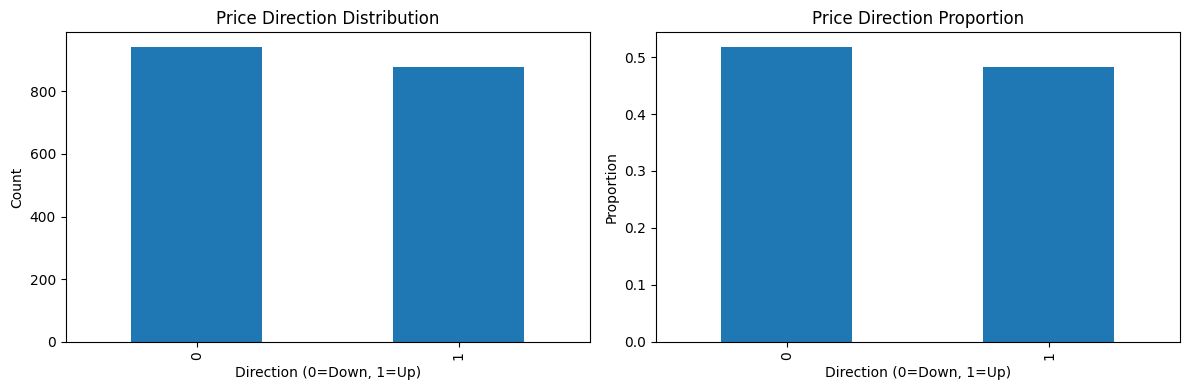

In [47]:
# Visualise the target varriable
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df_Final_Data['next_day_price_direction'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Price Direction Distribution')
axes[0].set_xlabel('Direction (0=Down, 1=Up)')
axes[0].set_ylabel('Count')

df_Final_Data['next_day_price_direction'].value_counts(normalize=True).plot(kind='bar', ax=axes[1])
axes[1].set_title('Price Direction Proportion')
axes[1].set_xlabel('Direction (0=Down, 1=Up)')
axes[1].set_ylabel('Proportion')
plt.tight_layout()
plt.show()

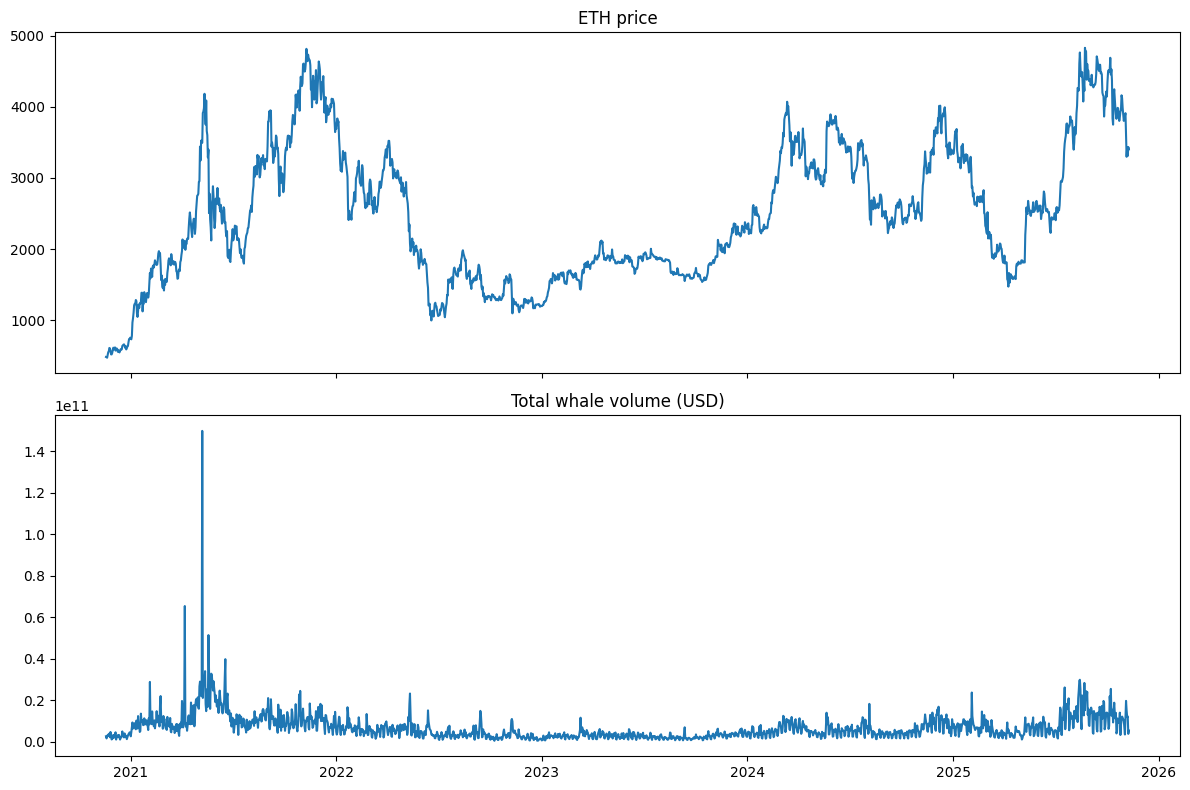

In [53]:
# Time Series Visualization

# time series of price and total_whale_volume_usd
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)
ax[0].plot(df_Final_Data.block_date, df_Final_Data.price_usd); ax[0].set_title("ETH price")
ax[1].plot(df_Final_Data.block_date, df_Final_Data.total_whale_volume_usd); ax[1].set_title("Total whale volume (USD)")
plt.tight_layout()


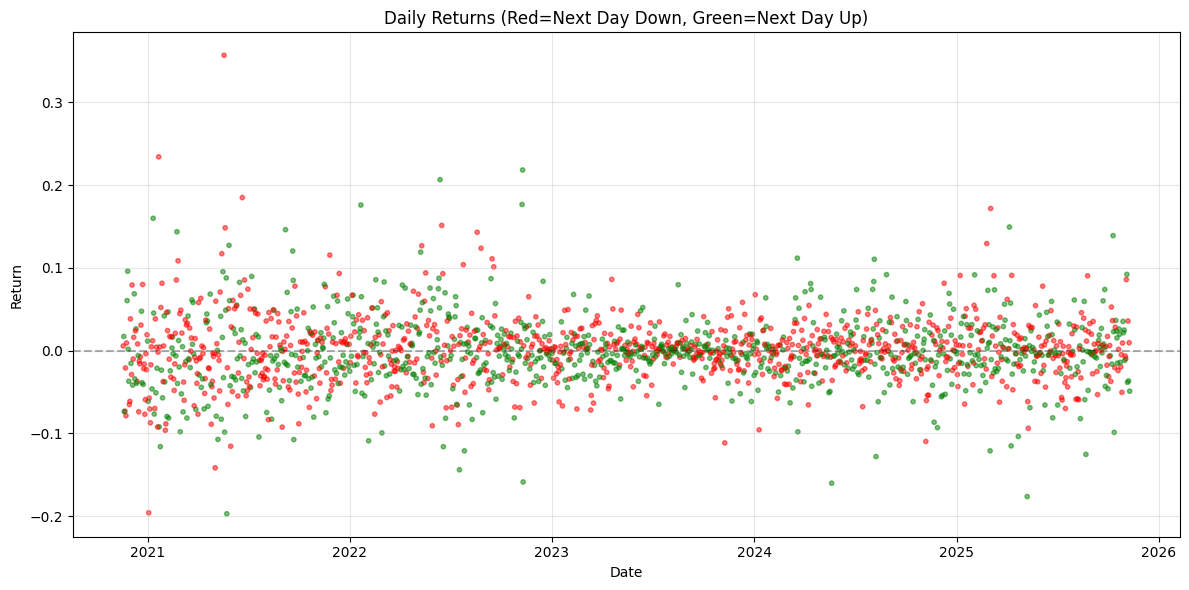

In [63]:
# Single plot for Daily Returns
fig, ax = plt.subplots(figsize=(12, 6))  # Single plot
colors = ['red' if x == 0 else 'green' for x in df_Final_Data['next_day_price_direction']]
ax.scatter(df_Final_Data['block_date'], df_Final_Data['daily_return'], c=colors, alpha=0.5, s=10)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
ax.set_title('Daily Returns (Red=Next Day Down, Green=Next Day Up)')
ax.set_ylabel('Return')
ax.set_xlabel('Date')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()